In [1]:
import mlflow
import pandas as pd
import matplotlib.pyplot as plt
from pandas_profiling import ProfileReport

In [2]:
runs = mlflow.search_runs('0')

In [3]:
print(runs.shape)
runs.head()

(8, 28)


,run_id,experiment_id,status,artifact_uri,start_time,end_time,metrics.epoch_geometry_loss,metrics.epoch_score_loss,metrics.iteration_loss,metrics.iteration_geometry_loss,...,params.num_epochs,params.lr,params.model_name,params.batch_size,params.lr_gamma,params.lr_step_size,params.lambda_score,tags.mlflow.source.type,tags.mlflow.source.name,tags.mlflow.user
0,9d7cbf7d73cf4e1eb95d1f7fa0ab1041,0,FINISHED,file:///home/gokulkarthikk/Detection/mlruns/0/...,2020-07-18 14:31:44.355000+00:00,2020-07-19 06:19:15.551000+00:00,0.293903,0.144543,0.391407,0.255349,...,30,0.001,EAST,32,0.5,5,1,LOCAL,/opt/conda/lib/python3.7/site-packages/ipykern...,gokulkarthikk
1,30c244c16a87406bbb7a89c0138d786d,0,FAILED,file:///home/gokulkarthikk/Detection/mlruns/0/...,2020-07-18 14:14:14.886000+00:00,2020-07-18 14:16:42.659000+00:00,NaN,NaN,1.983227,0.890758,...,30,0.001,EAST,32,0.5,5,1,LOCAL,/opt/conda/lib/python3.7/site-packages/ipykern...,gokulkarthikk
2,dd0c6d1ad96b4e5a9e8eaeb80a4b8511,0,FINISHED,file:///home/gokulkarthikk/Detection/mlruns/0/...,2020-07-08 07:05:12.777000+00:00,2020-07-08 14:42:43.932000+00:00,0.275523,0.140152,0.529052,0.372046,...,30,0.001,EAST,32,0.5,5,1,LOCAL,/opt/conda/lib/python3.7/site-packages/ipykern...,gokulkarthikk
3,a55c978801e34bf2adbddeea6f1960d7,0,RUNNING,file:///home/gokulkarthikk/Detection/mlruns/0/...,2020-07-08 04:33:45.022000+00:00,NaT,0.435742,0.351264,0.822146,0.490051,...,30,0.001,EAST,16,0.5,5,1,LOCAL,/opt/conda/lib/python3.7/site-packages/ipykern...,gokulkarthikk
4,9845cdbb6c2947e8b27fe9c7fe23dba3,0,FAILED,file:///home/gokulkarthikk/Detection/mlruns/0/...,2020-07-08 04:33:18.454000+00:00,2020-07-08 04:33:25.613000+00:00,NaN,NaN,NaN,NaN,...,30,0.001,EAST,32,0.5,5,1,LOCAL,/opt/conda/lib/python3.7/site-packages/ipykern...,gokulkarthikk


In [4]:
run = runs.iloc[0, :]

In [5]:
metrics_dir = run['artifact_uri'].replace('artifacts', 'metrics/')
iterations = pd.DataFrame()
iterations['score_loss'] = pd.read_csv(metrics_dir+'iteration_score_loss', sep=" ", header=None).iloc[:, 1]
iterations['geometry_loss'] = pd.read_csv(metrics_dir+'iteration_geometry_loss', sep=" ", header=None).iloc[:, 1]
iterations['loss'] = pd.read_csv(metrics_dir+'iteration_loss', sep=" ", header=None).iloc[:, 1]

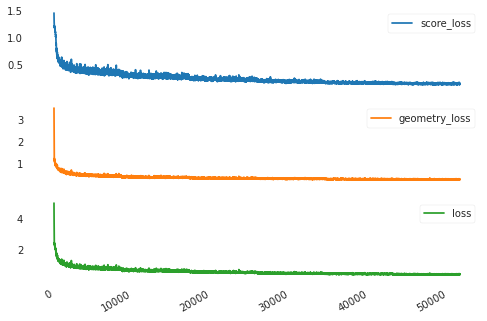

In [6]:
iterations.rolling(10).mean().plot(subplots=True)
plt.show()

In [7]:
iterations.head(n=10)

,score_loss,geometry_loss,loss
0,1.650919,3.616848,5.267767
1,1.546118,3.710693,5.256811
2,1.486356,3.584404,5.070761
3,1.464305,3.472640,4.936945
4,1.459105,3.771264,5.230370
5,1.440873,3.621011,5.061883
6,1.438993,3.546581,4.985573
7,1.441777,3.320339,4.762116
8,1.387219,3.526604,4.913823
9,1.333701,3.305329,4.639030


In [8]:
iterations.tail(n=10)

,score_loss,geometry_loss,loss
51560,0.175339,0.264627,0.439966
51561,0.119761,0.246536,0.366297
51562,0.157835,0.310530,0.468365
51563,0.121299,0.274678,0.395978
51564,0.219267,0.381073,0.600340
51565,0.142381,0.282037,0.424417
51566,0.114629,0.296246,0.410875
51567,0.138968,0.320256,0.459224
51568,0.150535,0.289801,0.440336
51569,0.136059,0.255349,0.391407


In [9]:
epochs_df = pd.DataFrame()
epochs_df['score_loss'] = pd.read_csv(metrics_dir+'epoch_score_loss', sep=" ", header=None).iloc[:, 1]
epochs_df['geometry_loss'] = pd.read_csv(metrics_dir+'epoch_geometry_loss', sep=" ", header=None).iloc[:, 1]
epochs_df['loss'] = pd.read_csv(metrics_dir+'epoch_loss', sep=" ", header=None).iloc[:, 1]
epochs_df['score_loss_val'] = pd.read_csv(metrics_dir+'epoch_score_loss_val', sep=" ", header=None).iloc[:, 1]
epochs_df['geometry_loss_val'] = pd.read_csv(metrics_dir+'epoch_geometry_loss_val', sep=" ", header=None).iloc[:, 1]
epochs_df['loss_val'] = pd.read_csv(metrics_dir+'epoch_loss_val', sep=" ", header=None).iloc[:, 1]

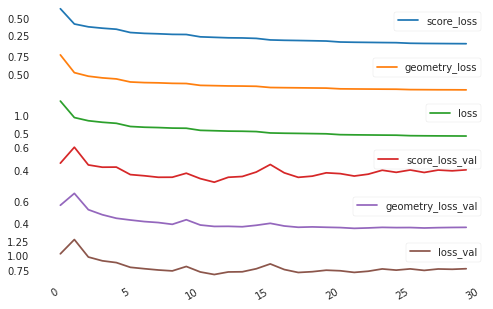

In [10]:
epochs_df.plot(subplots=True)
plt.show()

In [11]:
epochs_df

,score_loss,geometry_loss,loss,score_loss_val,geometry_loss_val,loss_val
0,0.639589,0.783252,1.422841,0.469384,0.570362,1.039745
1,0.423641,0.534940,0.958581,0.609304,0.677419,1.286723
2,0.383525,0.485142,0.868667,0.453752,0.530439,0.984191
3,0.364227,0.461661,0.825888,0.433871,0.484846,0.918717
4,0.349681,0.447035,0.796715,0.434809,0.453061,0.887869
5,0.302830,0.404303,0.707133,0.368959,0.437272,0.806231
6,0.290846,0.395621,0.686466,0.358614,0.423256,0.781870
7,0.284731,0.392031,0.676762,0.345452,0.414361,0.759813
8,0.276695,0.385207,0.661903,0.345900,0.398398,0.744298
9,0.274844,0.382748,0.657592,0.381069,0.439680,0.820749


**Trained only on score loss**

> score loss of 0.3-0.4 in val set is fine for starter 

> Best Val score Loss for U-Net: 0.36, EAST: 0.36

**Trained on score and geometry loss - best val scores**
 
* EAST:  score_loss:0.26, geo_loss:0.30